In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#### Задание 0. 
'''
Считайте в переменные tr_mcc_codes, tr_types, transactions и gender_train из одноимённых таблиц из папки data.
Для таблицы transactions используйте только первые n=1000000 строк.
Обратите внимание на разделители внутри каждого из файлов - они могут различаться!
'''
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';', encoding='utf-8')
tr_types = pd.read_csv('tr_types.csv', sep=';', encoding='utf-8')
transactions = pd.read_csv('transactions.csv', sep=',', encoding='utf-8', nrows=1000000)
gender_train = pd.read_csv('gender_train.csv', sep=',', encoding='utf-8')

In [3]:
#### Задание 1. 
'''
1. Для поля tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Из перечисленных вариантов выберите те, которые попали в топ-5 транзакций по частоте встречаемости.
'''
#### Выберите все верные пункты:
'''
    - 1) Выдача наличных в АТМ Сбербанк России
    - 2) Комиссия за обслуживание ссудного счета
    - 3) Списание по требованию	
    - 4) Оплата услуги. Банкоматы СБ РФ
    - 5) Погашение кредита (в пределах одного филиала)
    - 6) Покупка. POS ТУ СБ РФ
'''

trans_freq = transactions['tr_type'].value_counts().head()
print(trans_freq)
result = tr_types.loc[tr_types['tr_type'].isin(trans_freq.head().index)]
print(result)

tr_type
1010    231117
2010    151166
7070    149006
1110    137658
1030    118975
Name: count, dtype: int64
     tr_type                                     tr_description
59      7070  Перевод на карту (с карты) через Мобильный бан...
98      1010                              Покупка. POS ТУ СБ РФ
99      1030                     Оплата услуги. Банкоматы СБ РФ
101     1110                             Покупка. POS ТУ Россия
106     2010              Выдача наличных в АТМ Сбербанк России


In [4]:
#### Задание 2.
'''
1. В датафрейме transactions задайте столбец  customer_id в качестве индекса.
2. Выделите клиента с максимальной суммой транзакции (то есть с максимальным приходом на карту). (\*)
3. Найдите у него наиболее часто встречающийся модуль суммы приходов/расходов. (\**)
'''

#### Выберите все верные пункты:
'''
    - 1) 1122957.89
    - 2) 15721.41
    - 3) 22459.16 +
    - 4) 13475494.63
    - 5) 107407.78
    - 6) 65019.26
'''
##### Пояснения:
'''
(\*) Если у клиента были транзакции [-10000, 10, 0, -10], то максимумом будет являться значение 10. <br>
(\**) Если у клиента были транзакции [-10000, 10, 0, -10], то наиболее встречающийся модуль суммы транзакций равен 10,
и встретился он 2 раза.
'''
transactions.index = transactions['customer_id']
transactions[transactions['amount'] == transactions['amount'].max()]

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
customer_id,,,,,,
26782922,26782922,151 11:35:44,6010,7070,1.459845e+08,NaN


In [5]:
big_client = transactions[transactions['amount'] == transactions['amount'].max()].index[0]
np.abs(transactions[transactions['customer_id'] == big_client]['amount']).value_counts().head()

amount
22459.16      25
15721.41      12
4491831.54     7
1122957.89     6
3368873.66     5
Name: count, dtype: int64

In [6]:
#### Задание 3.
'''
1. Найдите максимальную разницу между медианами суммы транзакций, посчитанными при заданных ниже условиях по полю amount из таблицы transactions (\*):
    - Медиана суммы транзакций
    - Медиана суммы транзакций по тем строкам, которые ни в одном из своих столбцов не содержат пустые значения
    - Медиана суммы транзакций по строкам, отсортированным по полю amount в порядке возрастания, и из которых удалены дублирующиеся по столбцам 
      [mcc_code, tr_type] строки, причём при удалении соответстующих дублей остаются только последние из дублирующихся строк (keep='last')

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"
'''
##### Пояснения:
'''
(\*) Для вычисления максимальной разницы между значениями списка можно использовать функцию np.ptp  
(\**) Если в результате получились значения [1,3,5], то макимальная разница между ними 4 == 5-1.
'''

med = transactions['amount'].median()
med_cleared = transactions[~transactions.isnull().any(axis=1)]['amount'].median()
med_clear_dupl = transactions.sort_values(['amount']).drop_duplicates(['mcc_code', 'tr_type'], keep='last')['amount'].median()
print([med, med_cleared, med_clear_dupl])    

print(np.ptp([med, med_cleared, med_clear_dupl]))

[-5614.79, -5596.6, -920.83]
4693.96


In [7]:
#### Задание 4.
'''
Соедините transactions со всеми остальными таблицами 
(tr_mcc_codes, tr_types, gender_train).
Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
В результате соединения датафреймов должно получиться 999584 строки.
'''

df_t = pd.merge(transactions, tr_mcc_codes, on='mcc_code')
df_t = pd.merge(df_t, tr_types, on='tr_type')
transactions = pd.merge(df_t, gender_train, how='left', on='customer_id')

transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN


In [8]:
#### Задание 5.
'''
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.
'''

gender0 = transactions[(transactions['gender'] == 0) & (transactions['amount'] < 0)]['amount'].mean()
gender1 = transactions[(transactions['gender'] == 1) & (transactions['amount'] < 0)]['amount'].mean()

print(round(np.ptp([gender0, gender1]), 2))

32718.05


In [9]:
#### Задание 6:
'''
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount.
Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.
'''
##### Пояснения:
'''
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии.
Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()
'''
transactions['mcc_code+tr_type'] = np.int64(transactions['mcc_code'].astype(str) + transactions['tr_type'].astype(str))
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030


In [10]:
# transactions[transactions['amount'] < 0]['mcc_code+tr_type'].var()
# transactions[transactions['amount'] < 0].groupby('mcc_code+tr_type').filter(lambda df: len(df['amount']) >= 10).groupby('mcc_code+tr_type').var()
df_tmp = transactions[['amount', 'mcc_code+tr_type']][transactions.amount < 0]
df_tmp

variance = df_tmp.groupby('mcc_code+tr_type').filter(lambda df: len(df['amount']) >= 10).groupby('mcc_code+tr_type').var()

print(round(variance.max() / variance.min(), 2))

amount    9170599.0
dtype: float64


In [11]:
#### Задание 7:
'''
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount)
отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди 
всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 +
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия
'''
##### Пояснения:
'''
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]
'''


gender0 = transactions[(transactions.amount > 0) & (transactions['gender'] == 0)][['tr_description', 'amount']].groupby('tr_description').sum('amount').sort_values(by='amount')
gender1 = transactions[(transactions.amount > 0) & (transactions['gender'] == 1)][['tr_description', 'amount']].groupby('tr_description').sum('amount').sort_values(by='amount')

set(gender0.head().index) & set(gender1.head().index)

{'Плата за получение наличных в АТМ. Россия'}

In [13]:
#### Задание 8:
'''
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день
tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат,
выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины +
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны —
    места продажи алкогольных напитков" ниже мужских
'''
##### Пояснения:
'''
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.
'''
df_dates = transactions['tr_datetime'].str.split(expand=True)
df_dates.columns = ['tr_day','tr_time']
df_dates['tr_day'] = np.int64(df_dates['tr_day'])

df_works = pd.concat([transactions, df_dates], axis=1).groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75)
df_works

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type,tr_day,tr_time
6,39026145,13 11:17:34,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,13,11:17:34
7,39026145,18 07:39:05,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,18,07:39:05
8,39026145,19 13:24:35,4814,1030,-449.18,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,19,13:24:35
9,39026145,19 13:25:31,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,19,13:25:31
12,39026145,29 11:29:57,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,29,11:29:57
...,...,...,...,...,...,...,...,...,...,...,...,...
999576,9055616,270 23:37:21,3000,6000,570417.69,290594,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,0.0,30006000,270,23:37:21
999577,14937933,77 23:37:59,3000,6000,75687.36,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,77,23:37:59
999578,61463328,275 23:37:29,3000,6000,286601.31,290594,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,275,23:37:29
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,18,23:38:60


In [15]:
# # Определяем гендер
what = 'Детская одежда|Магазины косметики|Магазины ткани'
print(df_works[(df_works['gender'] == 0) & (df_works['mcc_description'].str.contains(what, na=False, regex=True))].groupby('mcc_description').size().sort_values(ascending=False))
# '''
# в перечне чаще встречаются: 
# Детская одежда, включая одежду для самых мален...
# Магазины косметики
# Магазины ткани, ниток рукоделия, шитья
# делаем вывод что 0 - это женский пол, тогда 1 мужской, для уверенности выводим мужские транзации и набдюдаем там следующие позиции
# Лесо- и строительный материал
# Горючее топливо — уголь, нефть, разжиженный бе...
# Автозапчасти и аксессуары
# '''

mcc_description
Магазины косметики                                    1280
Детская одежда, включая одежду для самых маленьких     510
Магазины ткани, ниток рукоделия, шитья                  62
dtype: int64


In [16]:
print(df_works[(df_works['gender'] == 1) & (df_works['mcc_description'].str.contains(what, na=False, regex=True))].groupby('mcc_description').size().sort_values(ascending=False))

# df_works[df_works['gender'] == 1].groupby('mcc_description').size().sort_values(ascending=False).head(20)

mcc_description
Магазины косметики                                    507
Детская одежда, включая одежду для самых маленьких    367
Магазины ткани, ниток рукоделия, шитья                 17
dtype: int64


In [17]:
# Абсолютное значение медианы с типом "Флористика" у мужчин выше - ответ ДА
df_works['amount_abs'] = np.abs(df_works['amount'])
df_works[df_works['mcc_description'].str.contains('Флористика')].groupby('gender')['amount_abs'].median()

gender
0.0    13890.99
1.0    18865.69
Name: amount_abs, dtype: float64

In [18]:
# Абсолютное значение медианы женских трат на ценные бумаги ниже мужских - ответ ДА
df_works[df_works['mcc_description'].str.contains('Ценные бумаги')].groupby('gender')['amount_abs'].median()

gender
0.0     6737.75
1.0    11229.58
Name: amount_abs, dtype: float64

In [19]:
# Абсолютное значение медианы женских трат в категории "Бары, коктейль-бары, дискотеки..." ниже мужских - ответ ДА
findline = 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков'
df_works[df_works['mcc_description'].str.contains(findline)].groupby('gender')['amount_abs'].median()

gender
0.0     9387.93
1.0    13475.49
Name: amount_abs, dtype: float64

In [20]:
### Задание 9:
'''
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.
'''

#### Вопросы:
'''
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.
'''
##### Пояснения:
'''
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])
'''

def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()


In [21]:
transactions['ab'] = pd.qcut(transactions[transactions['amount'] < 0].sort_values(by='amount')['amount'], 5, labels=['Very High','High','Middle','Low','Very Low']).cat.add_categories('Income')
transactions['ab'] = transactions['ab'].fillna('Income')
transactions

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type,tr_day,ab
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,0,Very Low
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,6,Low
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,8,Very Low
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,11,Very Low
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,11,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,18,Income
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,206,Income
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,90,Income
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,NaN,30006000,104,Income


In [22]:
def get_hour(df_line):
    return int(df_line.split()[1].split(':')[0])

transactions['tr_hour'] = transactions['tr_datetime'].apply(get_hour)

df_w = transactions.copy()

# Тут почему то была ошибка при чтении поля tr_datetime, убрал все не используемые поля в копии данных

del df_w['tr_datetime']
del df_w['mcc_code+tr_type']
del df_w['mcc_description']
del df_w['tr_description']
del df_w['mcc_code']
del df_w['customer_id']

df_w = pd.pivot_table(df_w, columns=['ab'], index=['tr_hour'], values=['gender'])

df_w

gender                                                  
ab      Very High      High    Middle       Low  Very Low    Income
tr_hour                                                            
0        0.578957  0.581928  0.530195  0.544178  0.517352  0.737148
1        0.583643  0.594737  0.578947  0.539936  0.450237  0.965922
2        0.524804  0.454183  0.489796  0.371014  0.349099  0.965834
3        0.533541  0.390374  0.434000  0.358879  0.284333  0.945011
4        0.505653  0.438721  0.428981  0.450858  0.290030  0.914473
5        0.524298  0.442200  0.459046  0.355699  0.374491  0.880842
6        0.516811  0.459614  0.431373  0.416000  0.366095  0.815352
7        0.518356  0.461418  0.485009  0.433982  0.412609  0.757958
8        0.552372  0.478275  0.472192  0.436529  0.431677  0.725043
9        0.517915  0.484714  0.448969  0.429991  0.406120  0.728651
10       0.533172  0.458109  0.458242  0.436683  0.430791  0.725908
11       0.516565  0.478921  0.446749  0.445670  0.395197  0.722264
12       0.518710  0.469492  0.453866  0.475615  0.405972  0.749237
13       0.510590  0.452802  0.438020  0.424311  0.406138  0.763304
14       0.505912  0.466944  0.455181  0.457965  0.413147  0.770755
15       0.516746  0.453521  0.442753  0.437569  0.409968  0.761136
16       0.525777  0.463021  0.452719  0.429328  0.399145  0.735235
17       0.551801  0.479541  0.502673  0.500000  0.444257  0.631241
18       0.532445  0.495042  0.513533  0.522853  0.483719  0.547744
19       0.555212  0.540087  0.538301  0.554324  0.472097  0.507789
20       0.588857  0.537678  0.554148  0.574704  0.469018  0.492320
21       0.610084  0.566735  0.581828  0.615127  0.466822  0.515667
22       0.624886  0.633136  0.633929  0.632524  0.443955  0.612475
23       0.592145  0.626289  0.649485  0.617450  0.406798  0.763496

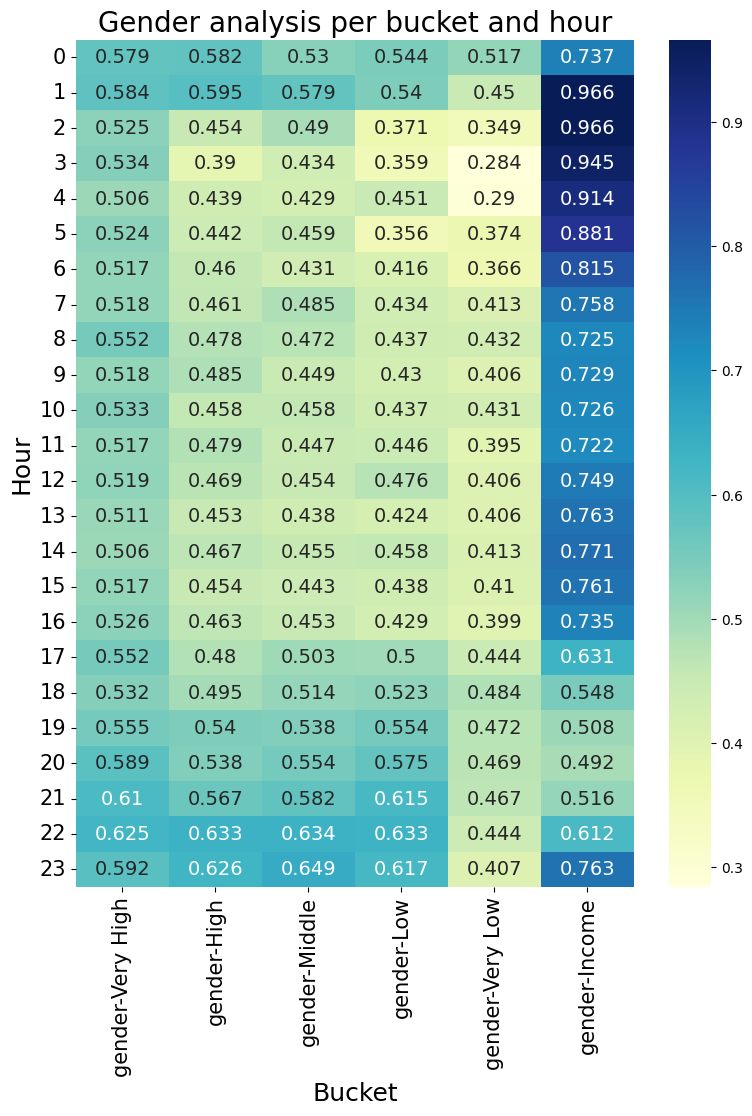

In [23]:
plot_pivot_table(df_w)

In [24]:
'''
1. Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими. - ДА
2. Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод,
что количество поступлений средств женщинам в целом больше, чем мужчинам. - НЕТ
3. Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами. - ДА
4. Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%) - да вроде НЕТ
5. Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод,
что количество высоких трат в каждый возможный час мужчин больше, чем у женщин. - НЕТ
'''
print()

In [102]:
#### Задание 10:
'''
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.
'''
#### Вопросы:
'''
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами - ответ ДА
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки
      (в одном случае почти везде - траты, в другом - пополнения) - ответ ДА
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов - ответ НЕТ, чисто в серединке, зеленая линия 5411
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних - ответ Да
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. - скорее НЕТ синяя линия 4814.
'''
transactions['tr_day'] = df_dates['tr_day']

transactions['tr_day'] 

0           0
1           6
2           8
3          11
4          11
         ... 
999579     18
999580    206
999581     90
999582    104
999583    105
Name: tr_day, Length: 999584, dtype: int64

In [103]:
ind_60 = transactions['mcc_code'].value_counts()[transactions['mcc_code'].value_counts() > 60000]
trs_hi_level = transactions[transactions['mcc_code'].isin(ind_60.index)]
trs_hi_level

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,mcc_description,tr_description,gender,mcc_code+tr_type,tr_day,ab,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,0,Very Low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,6,Low,7
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,8,Very Low,7
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,11,Very Low,8
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,1.0,48141030,11,Very Low,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998285,5205423,178 11:31:28,6010,7041,606397.26,NaN,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через POS (из одног...,NaN,60107041,178,Income,11
998286,76606773,370 07:05:51,6010,7041,11319.42,014337,Финансовые институты — снятие наличности вручную,Перевод на карту (с карты) через POS (из одног...,0.0,60107041,370,Income,7
998287,15854896,109 13:41:04,6010,1000,-44117.20,NaN,Финансовые институты — снятие наличности вручную,Покупка.ТУ СБ РФ,1.0,60101000,109,High,13
998295,18654396,440 13:10:22,5411,6210,3897.56,931938,"Бакалейные магазины, супермаркеты",Возврат покупки.POS Зарубеж. ТУ,1.0,54116210,440,Income,13


In [104]:
tr_grouped = trs_hi_level.groupby(['tr_day', 'mcc_code'])['amount'].mean().unstack()
parampampam = transactions[['mcc_code', 'mcc_description']]

parampampam[parampampam['mcc_code'].isin(tr_grouped.columns)].groupby(['mcc_code', 'mcc_description']).count()

,
mcc_code,mcc_description
4814,"Звонки с использованием телефонов, считывающих магнитную ленту"
4829,Денежные переводы
5411,"Бакалейные магазины, супермаркеты"
6010,Финансовые институты — снятие наличности вручную
6011,Финансовые институты — снятие наличности автоматически


<Axes: xlabel='tr_day'>

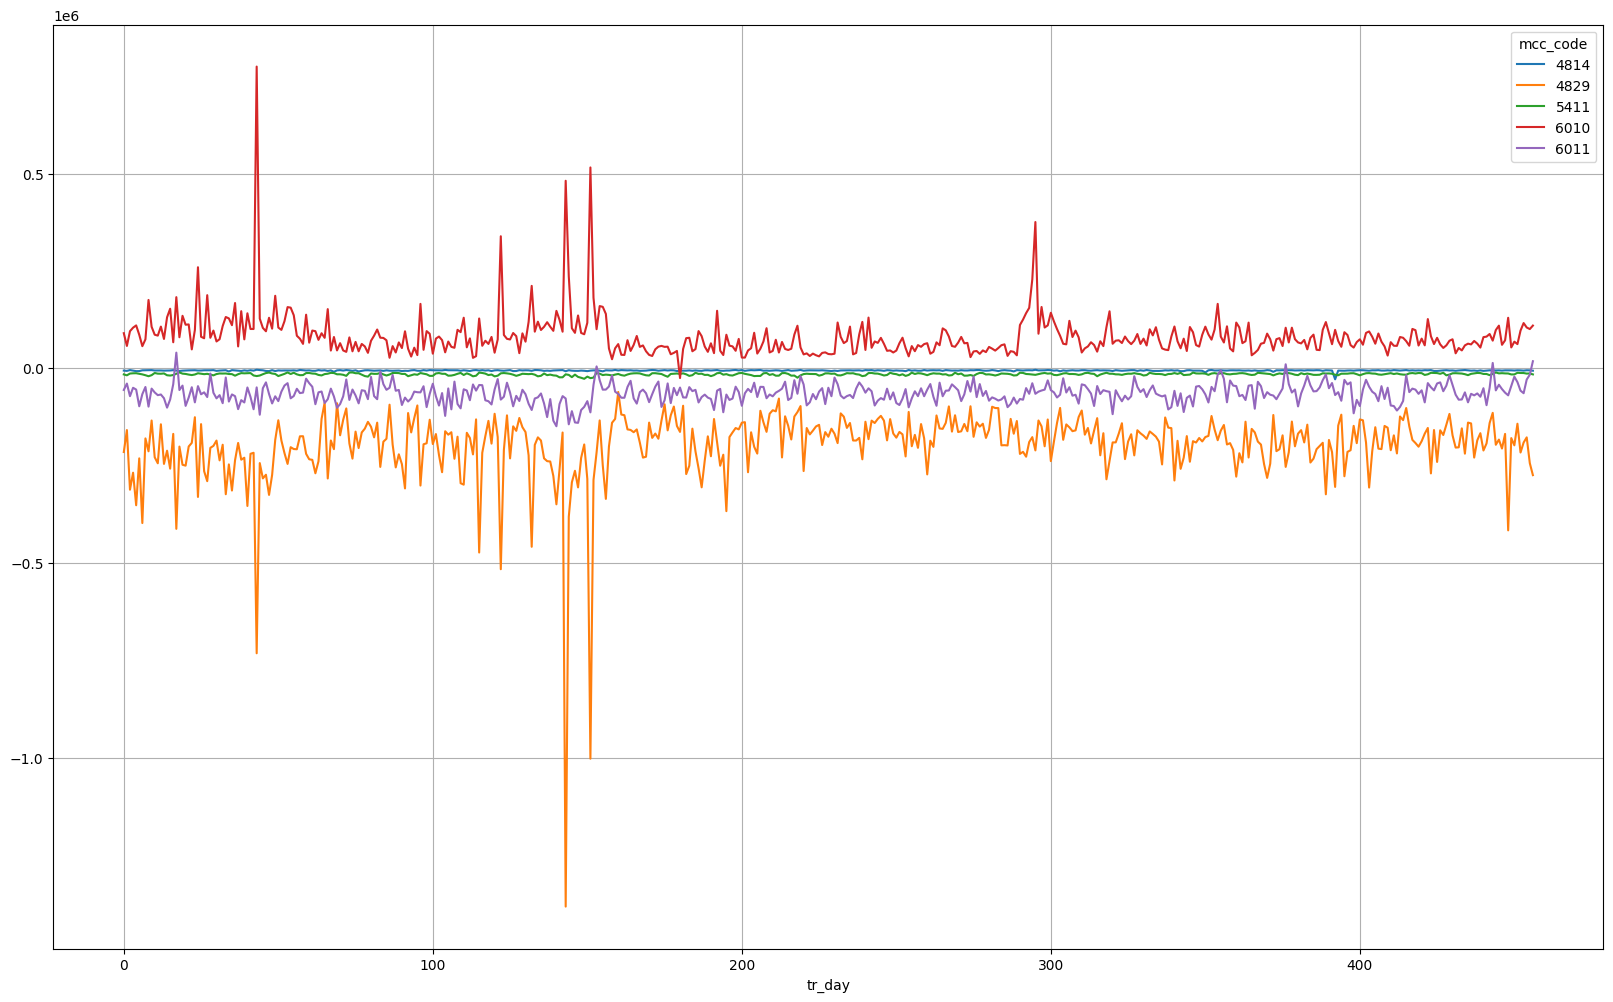

In [105]:
tr_grouped.plot(figsize=(20, 12), grid=True)